In [1]:
# Right-distance
# Right-Weight
# Left-distance
# Left-Weight
# Class: Left, Right, Balance

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz



from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data_source = "./datasets/balance-scale.data"
data = pd.read_csv(data_source, 
                   delimiter=',', 
                   names=['answer',
                          'right_distance',
                          'right_weight',
                          'left_distance',
                          'left_weight'],
                   header=None)
print(data.head(10))
for col in data.columns:
    print(col, 'type:', type(col))

  answer  right_distance  right_weight  left_distance  left_weight
0      B               1             1              1            1
1      R               1             1              1            2
2      R               1             1              1            3
3      R               1             1              1            4
4      R               1             1              1            5
5      R               1             1              2            1
6      R               1             1              2            2
7      R               1             1              2            3
8      R               1             1              2            4
9      R               1             1              2            5
answer type: <class 'str'>
right_distance type: <class 'str'>
right_weight type: <class 'str'>
left_distance type: <class 'str'>
left_weight type: <class 'str'>


In [4]:
X = data[['right_distance', 'right_weight', 'left_distance', 'left_weight']]
y = data['answer']

In [5]:


# Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=12)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=5, 
                              random_state=21, 
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.7819148936170213


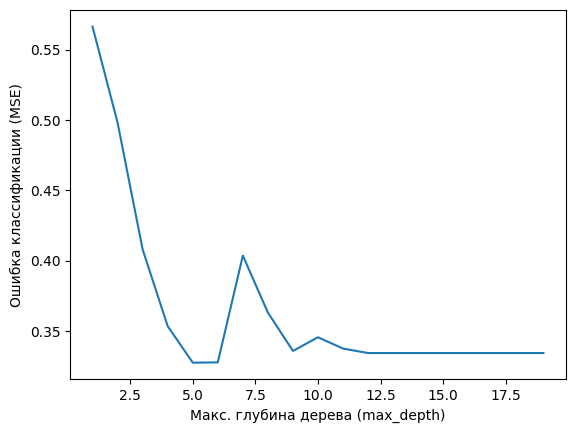

Оптимальные значения max_depth:  [5]


In [6]:
# Значения параметра max_depth
d_list = list(range(1,20))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d, 
                                  random_state=21, 
                                  max_features=2)
    scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения max_depth: ', all_d_min)

In [7]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(X, y)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 10, 'max_features': 3}
Лучшие баллы cross validation:  0.6931131592421915


In [8]:
MAX_DEPTH = 10
MAX_LENGTH = 3
dtc = DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=21, max_features=MAX_LENGTH)
dtc.fit(X, y)


DecisionTreeClassifier(max_depth=10, max_features=3, random_state=21)

In [9]:
export_graphviz(dtc, 
                feature_names=X.columns,
                class_names=y.unique(),
                out_file='./img/data_graph.dot',  
                filled=True, rounded=True)

with open('./img/data_graph.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render('img/graph_img',format='png', view=False)

'img/graph_img.png'

![graph](img/graph_img.png)

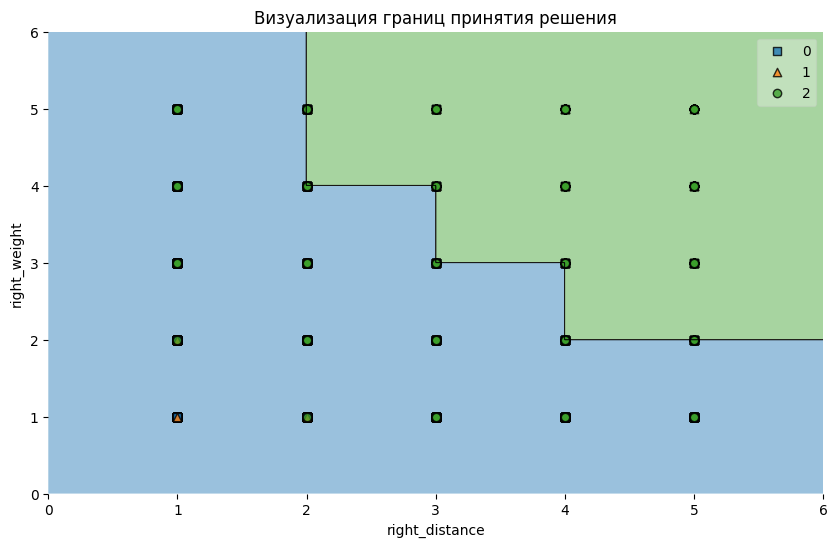

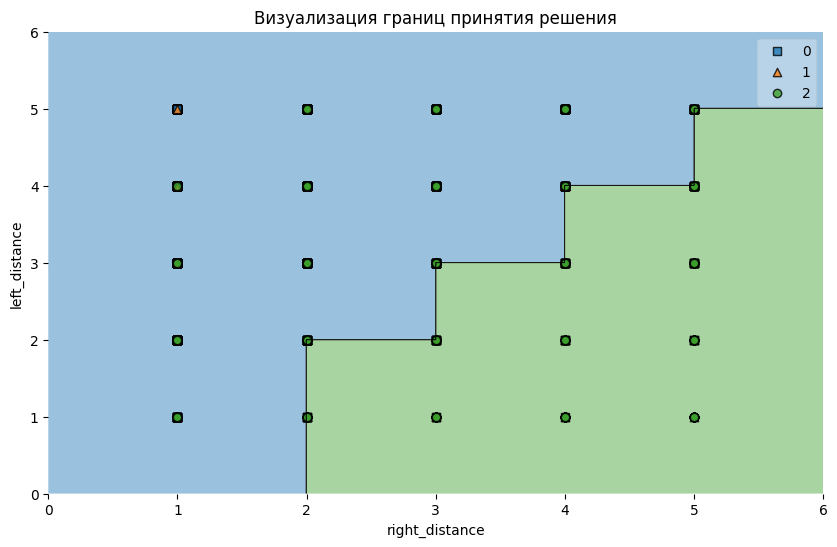

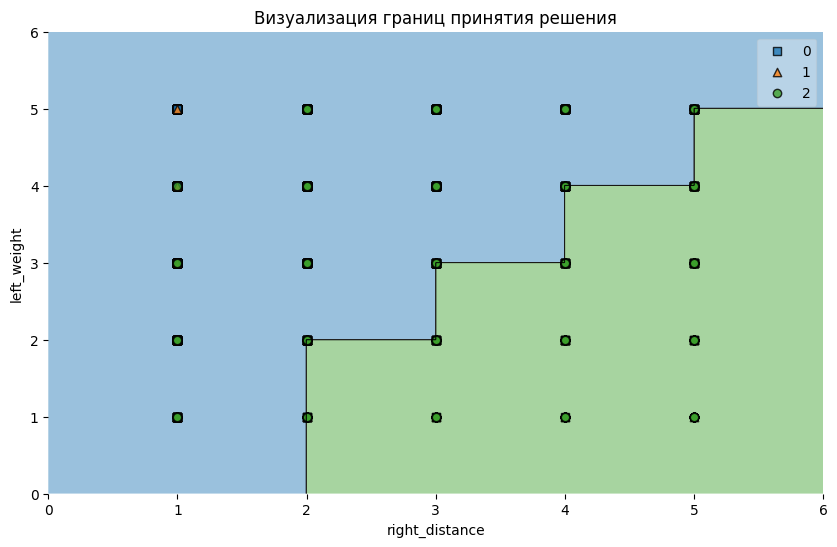

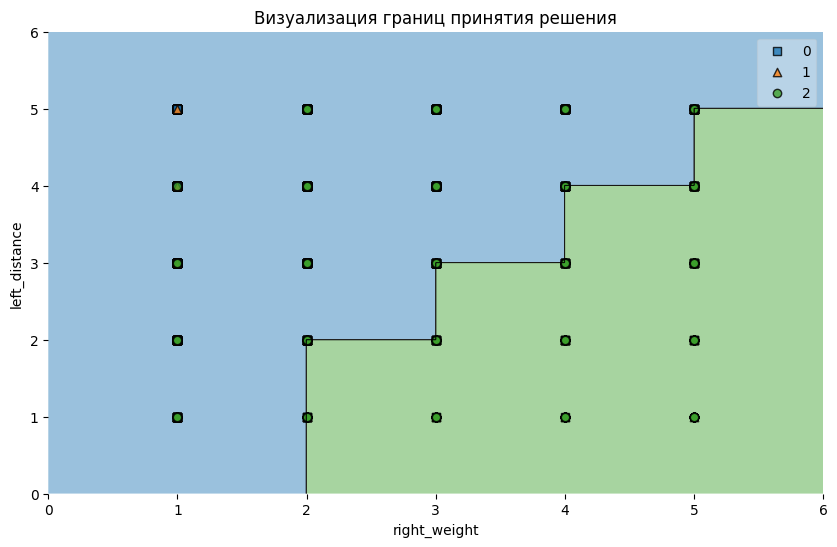

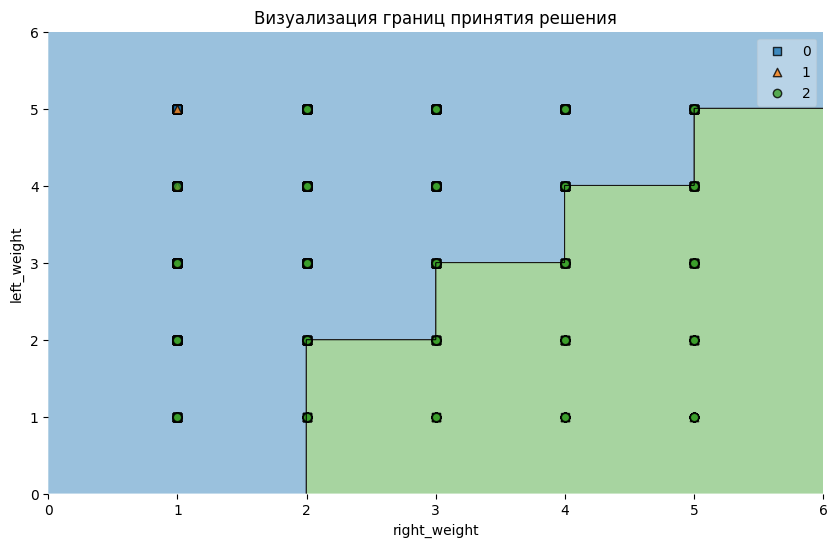

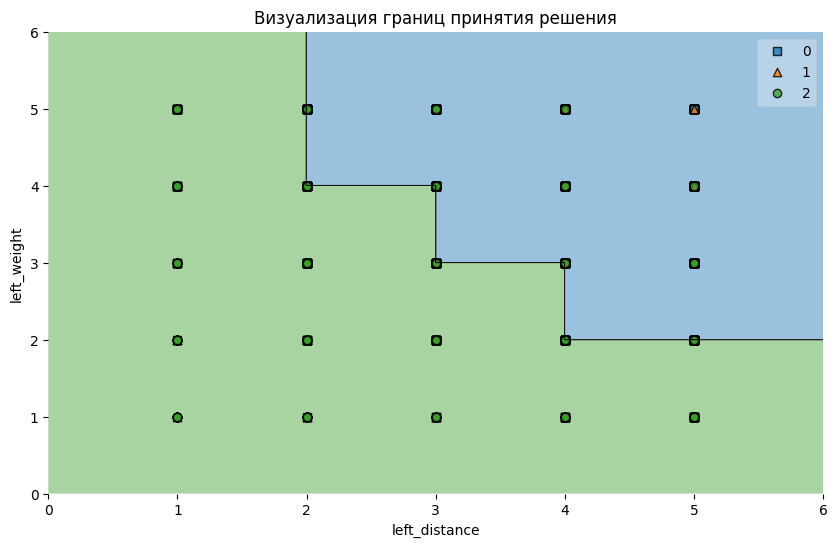

In [10]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


y_train_numeric = y.map({'R': 0, 'B': 1, 'L':2})

cols = X.columns

for i in range(4):
    for j in range(i+1, 4):
        X_train_subset = X[[cols[i], cols[j]]].values
        tree = DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=21, max_features=MAX_LENGTH)
        tree.fit(X_train_subset, y_train_numeric)
        plt.figure(figsize=(10, 6))
        plot_decision_regions(X_train_subset, y_train_numeric.values, clf=tree, legend=1)
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.title('Визуализация границ принятия решения')
        plt.show()

In [11]:
dtc = DecisionTreeClassifier(max_depth=MAX_DEPTH, 
                             random_state=21, 
                             max_features=MAX_LENGTH)
dtc.fit(X.values, y.values)


# Использование классификатора
# Объявление признаков объекта

right_distance = float(input('right distance: '))
right_weight = float(input('right weight: '))
left_distance = float(input('left distance: '))
left_weight = float(input('left weight: '))
X_new = np.array([[right_distance, right_weight, left_distance, left_weight]])

# Получение ответа для нового объекта
target = dtc.predict(X_new)


print('class: ',target[0])

right distance:  1
right weight:  2
left distance:  1
left weight:  2


class:  B
